In [2]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import json
import pandas as pd
import numpy as np


In [4]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", 'FZBCDV5YsaVzGnLOlLgdkQeSR')

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("7qfh-tkr3", limit=60000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [5]:
results_df.describe()

,combustible,estado,modelo,fecha_registro,anio_registro,clasificacion,clase,servicio,marca,linea,...,organismo_transito,municipio,departamento,capacidad_pasajeros,peso,potencia,ejes,cantidad,cilindraje,capacidad_carga
count,56545,56545,56545,56545,56545,56545,56545,56545,56545,56545,...,56545,56545,56545,1311,54116,55548,54473,56545,53054,6220
unique,3,2,21,2344,13,3,13,3,203,589,...,180,176,29,12,272,206,7,1,121,165
top,GASO ELEC,ACTIVO,2022,2022-04-29T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,TOYOTA,COROLLA CROSS,...,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,0,1850,126,2,1,1798,0
freq,45550,56544,22561,297,25878,54682,29565,52701,17994,7278,...,25499,25507,25507,769,7277,13476,53866,56545,13471,4318


In [6]:
results_df['id'] = range(1, len (results_df)+1)

In [7]:
results_df

,combustible,estado,modelo,fecha_registro,anio_registro,clasificacion,clase,servicio,marca,linea,...,municipio,departamento,capacidad_pasajeros,peso,potencia,ejes,cantidad,cilindraje,capacidad_carga,id
0,ELECTRICO,ACTIVO,2022,2022-06-30T00:00:00.000,2022,AUTOMOVIL,BUS,Público,BYD,BC11S01,...,BOGOTA,Bogota D.C.,49,20000,402,2,1,NaN,NaN,1
1,ELECTRICO,ACTIVO,2023,2022-10-21T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,BYD,YUAN PRO EV,...,PEREIRA,Risaralda,NaN,1980,134,2,1,0,NaN,2
2,ELECTRICO,ACTIVO,2014,2015-09-28T00:00:00.000,2015,MOTO,MOTOCICLETA,Particular,E-MOTORI,VITA,...,FLORENCIA,Caqueta,NaN,NaN,NaN,NaN,1,0,NaN,3
3,ELECTRICO,ACTIVO,2021,2022-08-10T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Público,DONGFENG,DFA5030XXYABEV7,...,FUNZA,Cundinamarca,NaN,2550,80,NaN,1,NaN,845,4
4,ELECTRICO,ACTIVO,2022,2021-10-25T00:00:00.000,2021,AUTOMOVIL,CAMIONETA,Particular,BYD,SONG PRO EV,...,EL ROSAL,Cundinamarca,NaN,2120,161,2,1,0,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56540,GASO ELEC,ACTIVO,2023,2022-10-06T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,MEDELLIN,Antioquia,NaN,1931,153,2,1,1998,NaN,56541
56541,GASO ELEC,ACTIVO,2023,2022-10-07T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,CHIA,Cundinamarca,NaN,1931,153,2,1,1998,NaN,56542
56542,GASO ELEC,ACTIVO,2023,2022-10-12T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,POPAYAN,Cauca,NaN,1931,153,2,1,1998,NaN,56543
56543,GASO ELEC,ACTIVO,2023,2022-09-30T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,BOGOTA,Bogota D.C.,NaN,1931,153,2,1,1998,NaN,56544


In [8]:
results_df.dtypes

combustible            object
estado                 object
modelo                 object
fecha_registro         object
anio_registro          object
clasificacion          object
clase                  object
servicio               object
marca                  object
linea                  object
carroceria             object
modalidad              object
organismo_transito     object
municipio              object
departamento           object
capacidad_pasajeros    object
peso                   object
potencia               object
ejes                   object
cantidad               object
cilindraje             object
capacidad_carga        object
id                      int64
dtype: object

In [9]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   combustible          56545 non-null  object
 1   estado               56545 non-null  object
 2   modelo               56545 non-null  object
 3   fecha_registro       56545 non-null  object
 4   anio_registro        56545 non-null  object
 5   clasificacion        56545 non-null  object
 6   clase                56545 non-null  object
 7   servicio             56545 non-null  object
 8   marca                56545 non-null  object
 9   linea                56545 non-null  object
 10  carroceria           56545 non-null  object
 11  modalidad            36663 non-null  object
 12  organismo_transito   56545 non-null  object
 13  municipio            56545 non-null  object
 14  departamento         56545 non-null  object
 15  capacidad_pasajeros  1311 non-null   object
 16  peso

In [10]:
results_df.isnull().sum()

combustible                0
estado                     0
modelo                     0
fecha_registro             0
anio_registro              0
clasificacion              0
clase                      0
servicio                   0
marca                      0
linea                      0
carroceria                 0
modalidad              19882
organismo_transito         0
municipio                  0
departamento               0
capacidad_pasajeros    55234
peso                    2429
potencia                 997
ejes                    2072
cantidad                   0
cilindraje              3491
capacidad_carga        50325
id                         0
dtype: int64

In [11]:
results_df.duplicated().sum()

0

In [12]:
results_df.rename(columns={'anio_registro': 'Fecha'}, inplace=True)

In [13]:
results_df

,combustible,estado,modelo,fecha_registro,Fecha,clasificacion,clase,servicio,marca,linea,...,municipio,departamento,capacidad_pasajeros,peso,potencia,ejes,cantidad,cilindraje,capacidad_carga,id
0,ELECTRICO,ACTIVO,2022,2022-06-30T00:00:00.000,2022,AUTOMOVIL,BUS,Público,BYD,BC11S01,...,BOGOTA,Bogota D.C.,49,20000,402,2,1,NaN,NaN,1
1,ELECTRICO,ACTIVO,2023,2022-10-21T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,BYD,YUAN PRO EV,...,PEREIRA,Risaralda,NaN,1980,134,2,1,0,NaN,2
2,ELECTRICO,ACTIVO,2014,2015-09-28T00:00:00.000,2015,MOTO,MOTOCICLETA,Particular,E-MOTORI,VITA,...,FLORENCIA,Caqueta,NaN,NaN,NaN,NaN,1,0,NaN,3
3,ELECTRICO,ACTIVO,2021,2022-08-10T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Público,DONGFENG,DFA5030XXYABEV7,...,FUNZA,Cundinamarca,NaN,2550,80,NaN,1,NaN,845,4
4,ELECTRICO,ACTIVO,2022,2021-10-25T00:00:00.000,2021,AUTOMOVIL,CAMIONETA,Particular,BYD,SONG PRO EV,...,EL ROSAL,Cundinamarca,NaN,2120,161,2,1,0,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56540,GASO ELEC,ACTIVO,2023,2022-10-06T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,MEDELLIN,Antioquia,NaN,1931,153,2,1,1998,NaN,56541
56541,GASO ELEC,ACTIVO,2023,2022-10-07T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,CHIA,Cundinamarca,NaN,1931,153,2,1,1998,NaN,56542
56542,GASO ELEC,ACTIVO,2023,2022-10-12T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,POPAYAN,Cauca,NaN,1931,153,2,1,1998,NaN,56543
56543,GASO ELEC,ACTIVO,2023,2022-09-30T00:00:00.000,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,BOGOTA,Bogota D.C.,NaN,1931,153,2,1,1998,NaN,56544


In [14]:
results_df['fecha_registro']=pd.to_datetime(results_df['fecha_registro'])
results_df['Fecha']=pd.to_datetime(results_df['Fecha'])
results_df['modelo']=pd.to_datetime(results_df['modelo'])


In [15]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   combustible          56545 non-null  object        
 1   estado               56545 non-null  object        
 2   modelo               56545 non-null  datetime64[ns]
 3   fecha_registro       56545 non-null  datetime64[ns]
 4   Fecha                56545 non-null  datetime64[ns]
 5   clasificacion        56545 non-null  object        
 6   clase                56545 non-null  object        
 7   servicio             56545 non-null  object        
 8   marca                56545 non-null  object        
 9   linea                56545 non-null  object        
 10  carroceria           56545 non-null  object        
 11  modalidad            36663 non-null  object        
 12  organismo_transito   56545 non-null  object        
 13  municipio            56545 non-

In [16]:
results_df['Año'] = results_df['Fecha'].dt.year
results_df

,combustible,estado,modelo,fecha_registro,Fecha,clasificacion,clase,servicio,marca,linea,...,departamento,capacidad_pasajeros,peso,potencia,ejes,cantidad,cilindraje,capacidad_carga,id,Año
0,ELECTRICO,ACTIVO,2022-01-01,2022-06-30,2022-01-01,AUTOMOVIL,BUS,Público,BYD,BC11S01,...,Bogota D.C.,49,20000,402,2,1,NaN,NaN,1,2022
1,ELECTRICO,ACTIVO,2023-01-01,2022-10-21,2022-01-01,AUTOMOVIL,CAMIONETA,Particular,BYD,YUAN PRO EV,...,Risaralda,NaN,1980,134,2,1,0,NaN,2,2022
2,ELECTRICO,ACTIVO,2014-01-01,2015-09-28,2015-01-01,MOTO,MOTOCICLETA,Particular,E-MOTORI,VITA,...,Caqueta,NaN,NaN,NaN,NaN,1,0,NaN,3,2015
3,ELECTRICO,ACTIVO,2021-01-01,2022-08-10,2022-01-01,AUTOMOVIL,CAMIONETA,Público,DONGFENG,DFA5030XXYABEV7,...,Cundinamarca,NaN,2550,80,NaN,1,NaN,845,4,2022
4,ELECTRICO,ACTIVO,2022-01-01,2021-10-25,2021-01-01,AUTOMOVIL,CAMIONETA,Particular,BYD,SONG PRO EV,...,Cundinamarca,NaN,2120,161,2,1,0,NaN,5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56540,GASO ELEC,ACTIVO,2023-01-01,2022-10-06,2022-01-01,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,Antioquia,NaN,1931,153,2,1,1998,NaN,56541,2022
56541,GASO ELEC,ACTIVO,2023-01-01,2022-10-07,2022-01-01,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,Cundinamarca,NaN,1931,153,2,1,1998,NaN,56542,2022
56542,GASO ELEC,ACTIVO,2023-01-01,2022-10-12,2022-01-01,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,Cauca,NaN,1931,153,2,1,1998,NaN,56543,2022
56543,GASO ELEC,ACTIVO,2023-01-01,2022-09-30,2022-01-01,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,Bogota D.C.,NaN,1931,153,2,1,1998,NaN,56544,2022


In [17]:
columnas_a_eliminar = ['modalidad', 'capacidad_pasajeros','capacidad_carga']
df_final = results_df.drop(columnas_a_eliminar, axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   combustible         56545 non-null  object        
 1   estado              56545 non-null  object        
 2   modelo              56545 non-null  datetime64[ns]
 3   fecha_registro      56545 non-null  datetime64[ns]
 4   Fecha               56545 non-null  datetime64[ns]
 5   clasificacion       56545 non-null  object        
 6   clase               56545 non-null  object        
 7   servicio            56545 non-null  object        
 8   marca               56545 non-null  object        
 9   linea               56545 non-null  object        
 10  carroceria          56545 non-null  object        
 11  organismo_transito  56545 non-null  object        
 12  municipio           56545 non-null  object        
 13  departamento        56545 non-null  object    

In [18]:
dfnan = df_final.replace(0,np.nan)

In [19]:
df_final['peso'].fillna(0, inplace=True)
df_final['potencia'].fillna(0, inplace=True)
df_final['ejes'].fillna(0, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_12148\1875797405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['peso'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12148\1875797405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [20]:
df_final['peso'] = df_final['peso'].astype(int)
df_final['potencia'] = df_final['potencia'].astype(int)
df_final['ejes'] = df_final['ejes'].astype(int)

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   combustible         56545 non-null  object        
 1   estado              56545 non-null  object        
 2   modelo              56545 non-null  datetime64[ns]
 3   fecha_registro      56545 non-null  datetime64[ns]
 4   Fecha               56545 non-null  datetime64[ns]
 5   clasificacion       56545 non-null  object        
 6   clase               56545 non-null  object        
 7   servicio            56545 non-null  object        
 8   marca               56545 non-null  object        
 9   linea               56545 non-null  object        
 10  carroceria          56545 non-null  object        
 11  organismo_transito  56545 non-null  object        
 12  municipio           56545 non-null  object        
 13  departamento        56545 non-null  object    

In [22]:
df_final['cantidad'] = pd.to_numeric(df_final['cantidad'], errors='coerce')


***Grafico de datos***

In [23]:
import matplotlib.pyplot as plt


*Se deja el año de registro como los datos del eje X*

In [24]:
df_final.index= df_final['Año']
df_final = df_final.drop('Año', axis='columns')


*Sumar la columna que me puede mostrar el vehiculo*

In [25]:
suma_por_año = df_final.groupby('Año').agg({'cantidad': 'sum'}).reset_index()


*Graficos*
1. **Vehiculos hibridos por año**

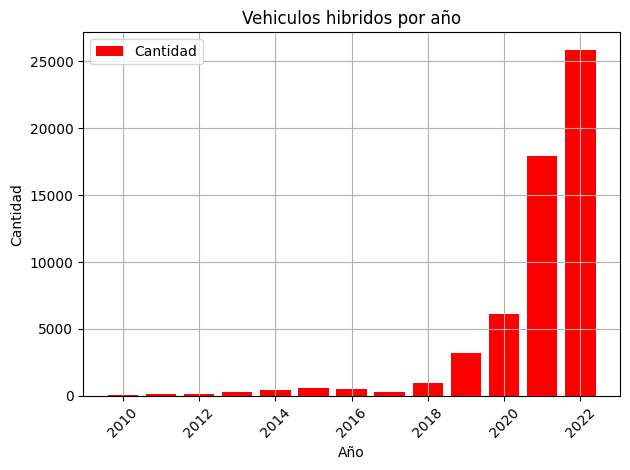

In [26]:
plt.bar(suma_por_año['Año'], suma_por_año['cantidad'], label='Cantidad', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Vehiculos hibridos por año')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar la superposición
plt.show()

GRAFICO TIPO PIE

In [27]:
suma_tipo_combustible= df_final.groupby('combustible')['cantidad'].sum()

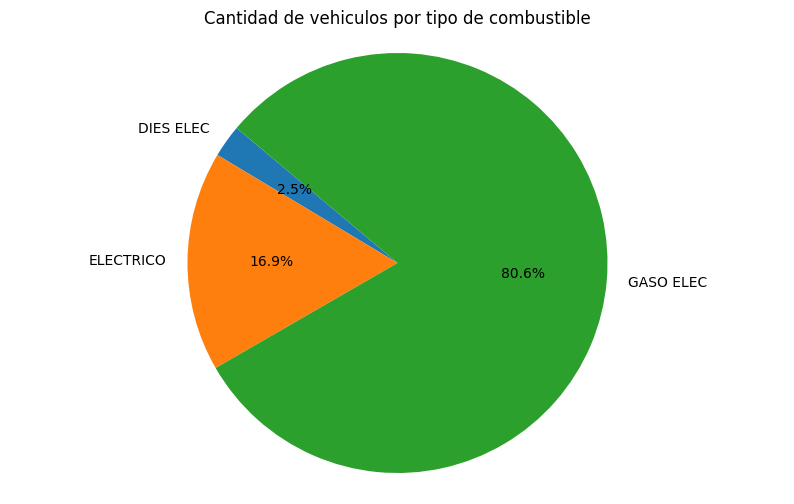

In [28]:
plt.figure(figsize=(10,6))
plt.pie(suma_tipo_combustible, labels=suma_tipo_combustible.index, autopct='%1.1f%%', startangle=140)
plt.title('Cantidad de vehiculos por tipo de combustible')
plt.axis('equal')
plt.show()

HISTOGRAMA

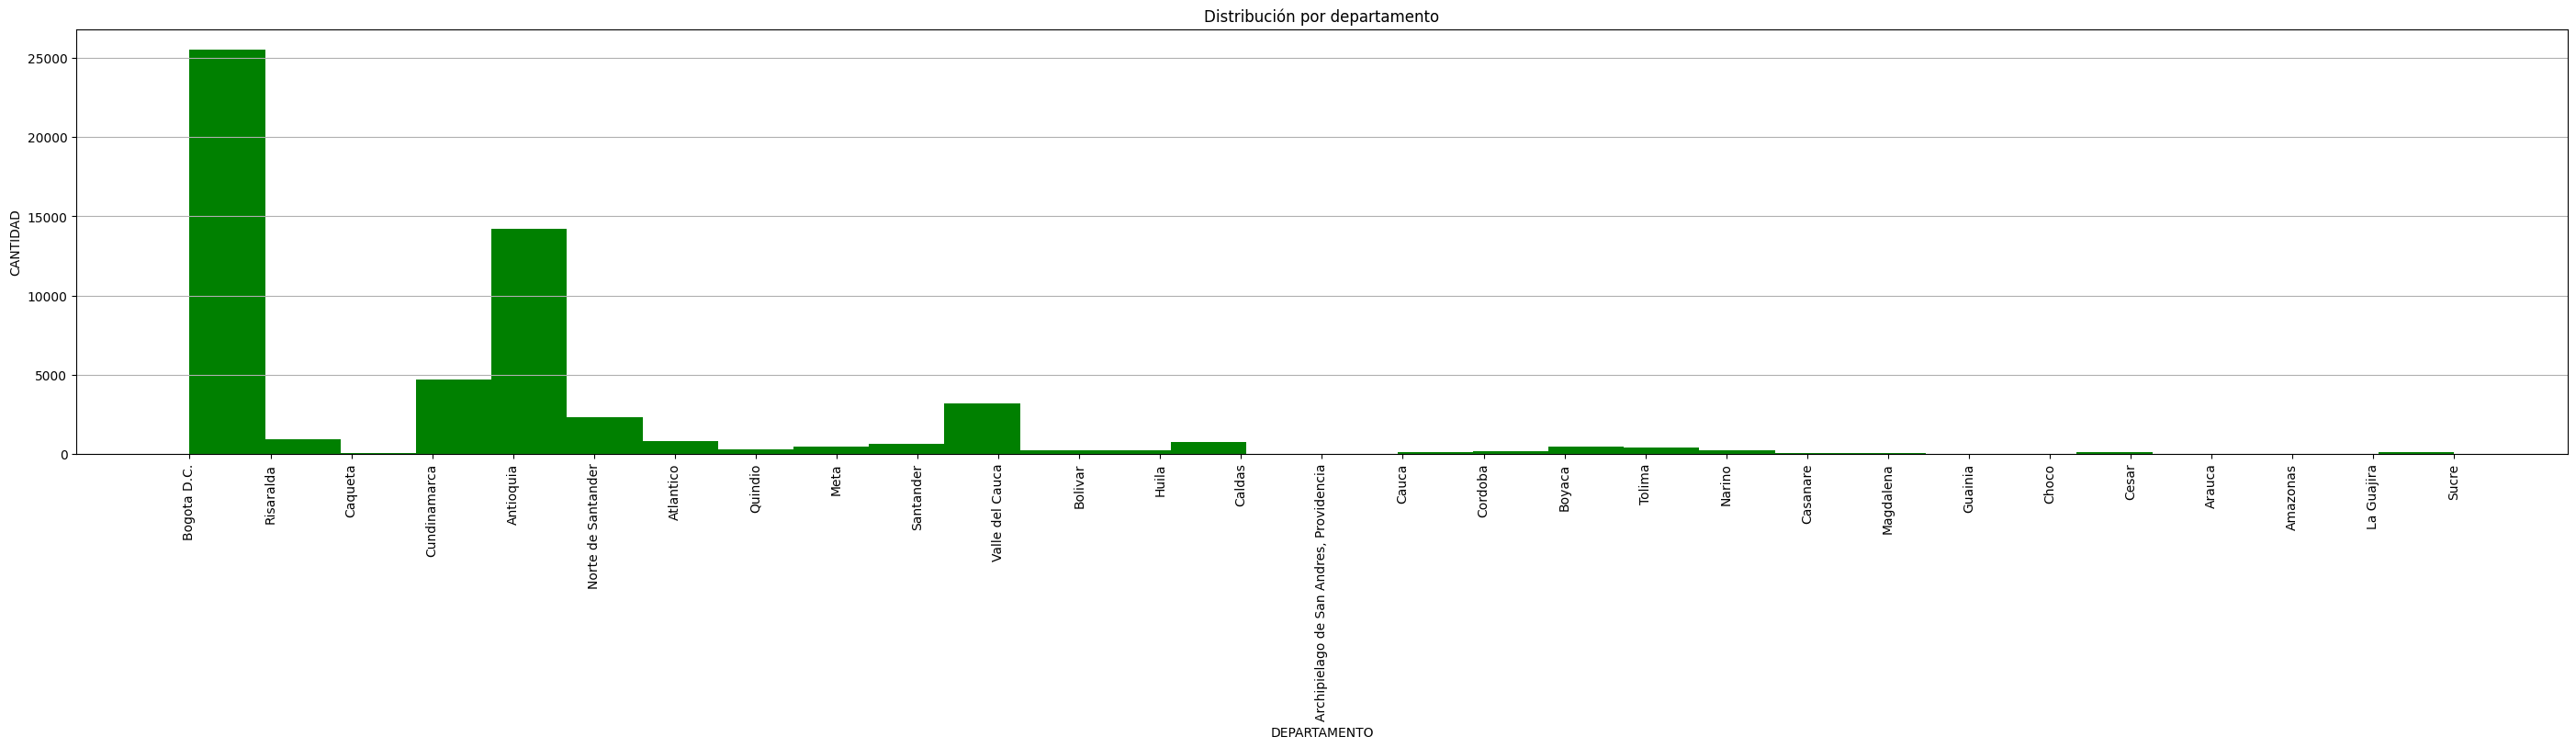

In [32]:
plt.figure(figsize=(35,6))
plt.hist(df_final['departamento'], bins=30, color= 'green')
plt.title('Distribución por departamento')
plt.xlabel('DEPARTAMENTO')
plt.ylabel('CANTIDAD')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=1)
plt.show()


GRAFICO POR SERVICIO

In [30]:
suma_servicio= df_final.groupby('servicio')['cantidad'].sum()

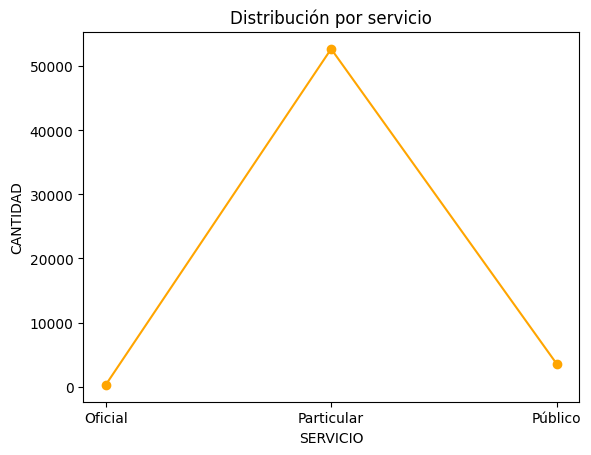

In [31]:
plt.plot(suma_servicio.index, suma_servicio.values, marker='o', linestyle='-', color='orange')
plt.title('Distribución por servicio')
plt.xlabel('SERVICIO')
plt.ylabel('CANTIDAD')
plt.show()
